# Load and Explore the Data

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
%pip install pymc3
%pip install yfinance
import pymc3 as pm
import yfinance as yf
from sklearn.preprocessing import StandardScaler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


### Load the Brent Oil Price Dataset

In [2]:
df = pd.read_csv("../data/raw/BrentOilPrices.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_43809/2882803527.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/raw/BrentOilPrices.csv", parse_dates=["Date"], dayfirst=True)


### Perform Exploratory Data Analysis (EDA)


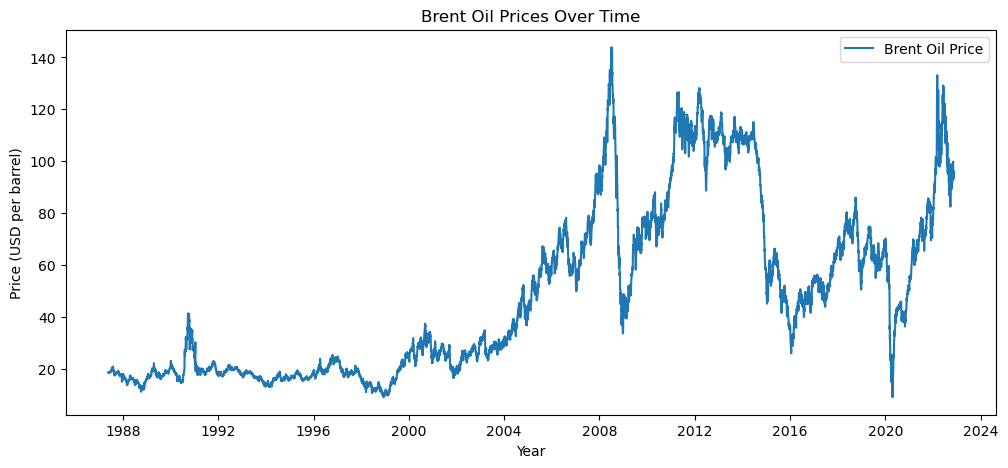

In [3]:
plt.figure(figsize=(12,5))
plt.plot(df['Price'], label='Brent Oil Price')
plt.xlabel("Year")
plt.ylabel("Price (USD per barrel)")
plt.title("Brent Oil Prices Over Time")
plt.legend()
plt.show()

### Test stationarity using the Augmented Dickey-Fuller Test (ADF Test)

In [4]:
adf_result = adfuller(df['Price'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"P-Value: {adf_result[1]}")

ADF Statistic: -1.993856011392468
P-Value: 0.28927350489340264


# Feature Engineering & Additional Data Sources

### Create Lagged Features

In [5]:
df["Price_Lag1"] = df["Price"].shift(1)
df["Price_Lag7"] = df["Price"].shift(7)
df.dropna(inplace=True)

### Add Economic Indicators
Pull GDP, Inflation, and USD Exchange Rate from Yahoo Finance

In [12]:
import socket
print(socket.gethostbyname("fc.yahoo.com"))  # Should return an IP address

87.248.119.252


In [13]:
# Download Dow Jones Index using 'DJI' instead of '^DJI'
gdp = yf.download("DJI", start="1990-01-01", end="2022-09-30")

# Check available columns
print(gdp.columns)

# Use 'Close' if 'Adj Close' isn't available
df["GDP"] = gdp["Close"].reindex(df.index, method="ffill")

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'DJI'),
            (  'High', 'DJI'),
            (   'Low', 'DJI'),
            (  'Open', 'DJI'),
            ('Volume', 'DJI')],
           names=['Price', 'Ticker'])


In [10]:
# Download Inflation (CPI ETF Proxy)
inflation = yf.download("CPI", start="1990-01-01", end="2022-09-30")
print(inflation.columns)  # Check available columns

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'CPI'),
            (  'High', 'CPI'),
            (   'Low', 'CPI'),
            (  'Open', 'CPI'),
            ('Volume', 'CPI')],
           names=['Price', 'Ticker'])


In [11]:
usd_eur = yf.download("EUR=X", start="1990-01-01", end="2022-09-30")
print(usd_eur.columns)  # Check available columns

df["USD_EUR"] = usd_eur["Close"].reindex(df.index, method="ffill")

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'EUR=X'),
            (  'High', 'EUR=X'),
            (   'Low', 'EUR=X'),
            (  'Open', 'EUR=X'),
            ('Volume', 'EUR=X')],
           names=['Price', 'Ticker'])


### Apply Time Series Models
ARIMA Model

In [14]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Price'], order=(1,1,1))
model_fit = model.fit()
df["ARIMA_Prediction"] = model_fit.fittedvalues

/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


###  Bayesian Analysis using PyMC3

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

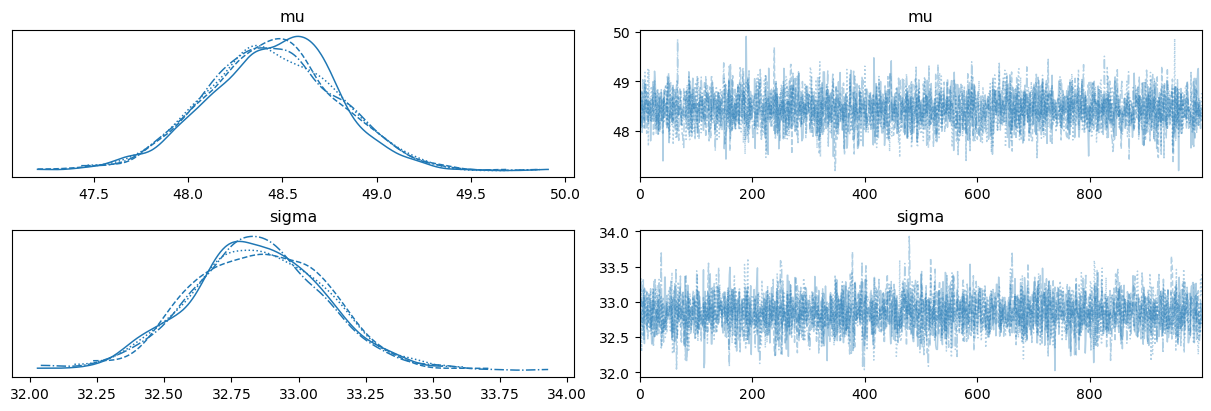

In [15]:
with pm.Model() as bayesian_model:
    mu = pm.Normal("mu", mu=df["Price"].mean(), sigma=df["Price"].std())
    sigma = pm.HalfNormal("sigma", sigma=10)
    observed = pm.Normal("obs", mu=mu, sigma=sigma, observed=df["Price"])
    trace = pm.sample(1000, return_inferencedata=True)

pm.plot_trace(trace)

### Machine Learning Model (LSTM for Deep Learning)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Price']])

X, y = [], []
for i in range(10, len(scaled_data)):
    X.append(scaled_data[i-10:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)